In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json
import re

Pull in the processed inventory

In [2]:
ra = "nanoos"

#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).


ra_clean = re.sub(r'[0-9]', '', ra) # remove number from RA 

df = pd.read_excel('2024/data/processed/%s.xlsx' % ra_clean.upper(), dtype=str)
df.head()

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,NANOOS,APL-UW ESP,NaN,APL-UW ESP Mooring,NaN,47.9717,-124.9533,moored buoy,2011-08-01 00:00:00,Y,NaN,Yp,Applied Physics Laboratory-University of Washi...,academic,APL-UW,APL-UW,N/A (see notes),No WMO ID because this asset does not serve da...
1,NANOOS,APL-UW NEMO Profiler,NaN,APL-UW NEMO-ESP Profiler,NaN,47.9667,-124.9549,profiling buoy,2011-08-01 00:00:00,Y,NaN,Yf,APL-UW,academic,APL-UW,APL-UW,"sea_water_electrical_conductivity (profiling),...",No WMO ID established yet; profiling from ~20m...
2,NANOOS,APL-UW Chaba,46119,Chaba UW/NANOOS Moored Buoy near La Push,NaN,47.9676,-124.96,moored buoy,2010-07-01 00:00:00,Y,NaN,Yp,APL-UW,academic,APL-UW,APL-UW,"air_temperature, surface_air_pressure, surface...",NaN
3,NANOOS,BB Quileute North,NaN,Backyard Buoys Quileute North,Pending,47.9425,-124.7645,wave buoy,2023-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending
4,NANOOS,BB Quileute South,NaN,Backyard Buoys Quileute South,Pending,47.85,-124.7,wave buoy,2024-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending


## Check column headers

The official column headers are found in the README at https://github.com/ioos/ioos-asset-inventory/tree/main. This checks the column headers from the RA inventory against our official column headers to see if anything is missing. The result will print out what columns are missing from the RA inventory and what columns the RA added to their inventory.

In [3]:
url = 'https://github.com/ioos/ioos-asset-inventory/tree/main'

import pandas as pd

df_fields = pd.read_html(url)#

control_fields = df_fields[2]['Field'].tolist()


def diff(a, b):
  if len(set(a) - set(b)) > 0:
    print(f"Columns missing: {set(a) - set(b)}")
  if len(set(b) - set(a)) > 0:
    print(f"Columns added: {set(b) - set(a)}")
  if set(a) == set(b):
    print(f"They are the same")

diff(control_fields, df.columns.tolist())

They are the same


Make a plot of all points.

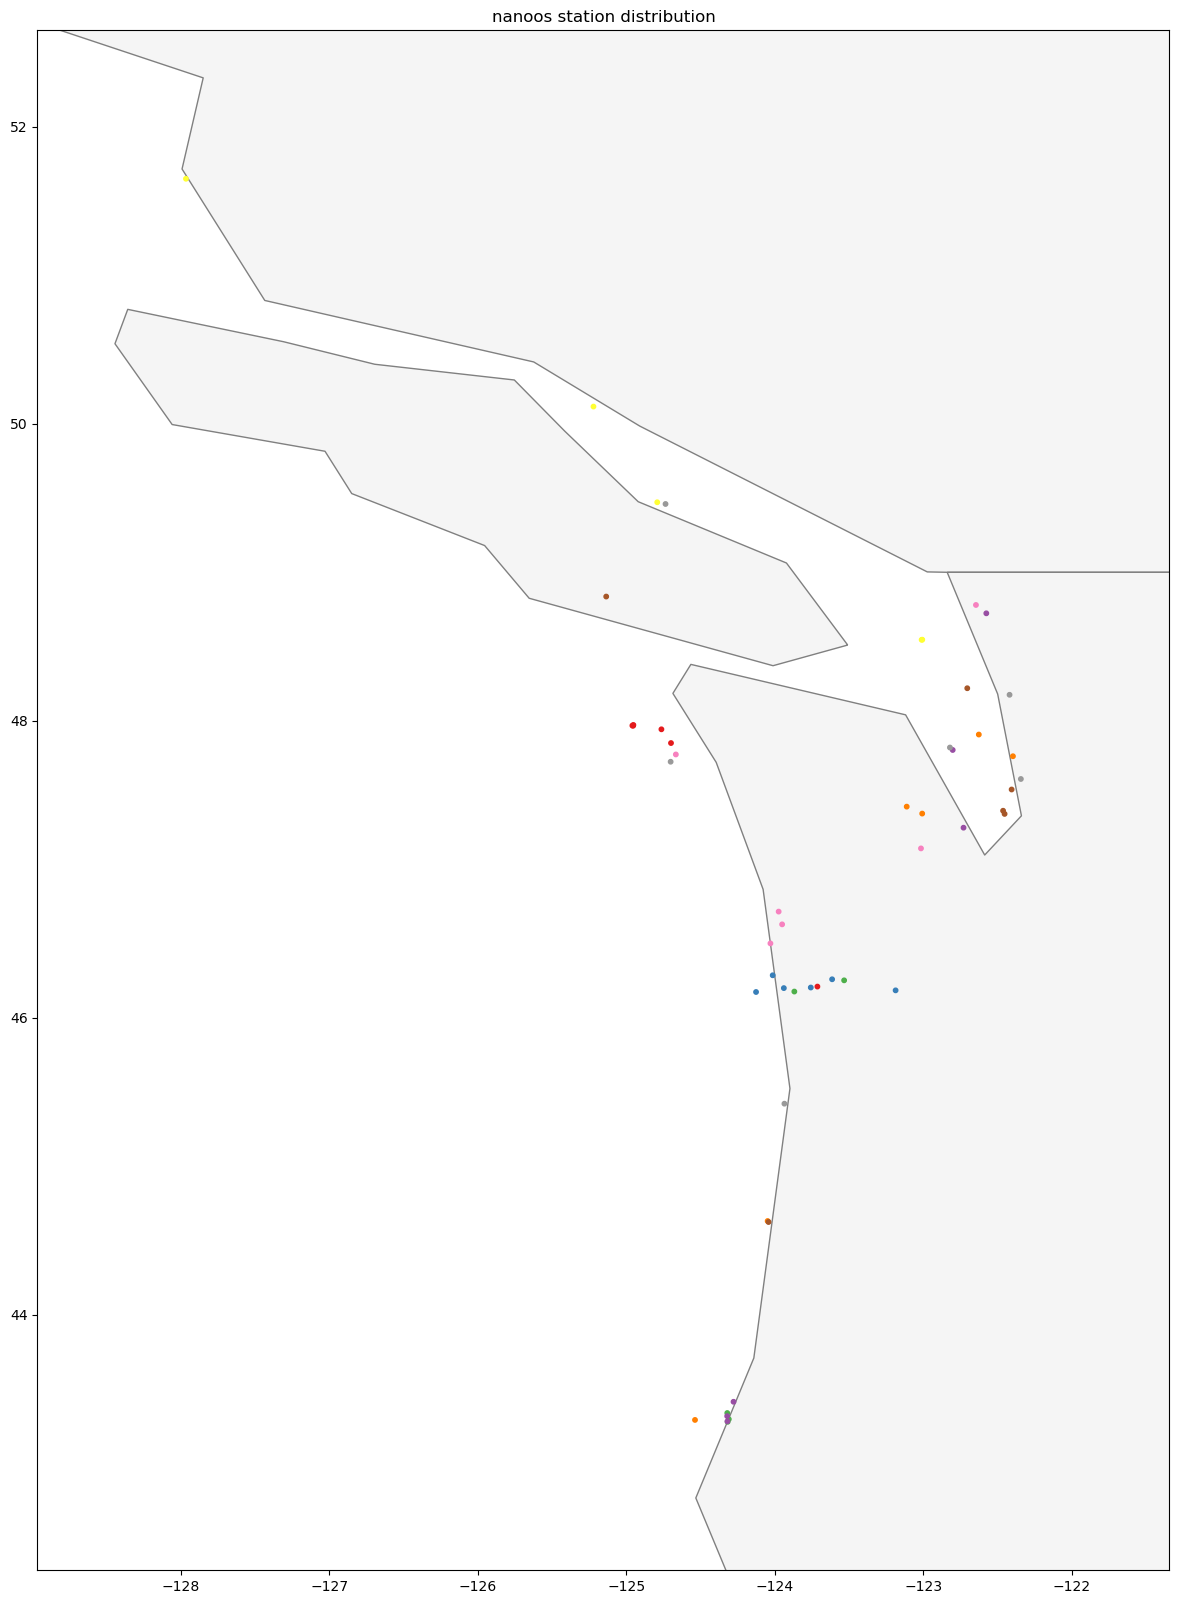

In [4]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         #column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [5]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore()#'erddap_avail',cmap = 'Set1')


Configure the ERDDAP to search

In [6]:
with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

http://data.nanoos.org/erddap


Search the ERDDAP server for a single station of interest - more of a test

In [7]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [8]:
# df_wf = df[df['Station ID'] == 'Jug_Bay']

# # for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
# search_for = df_wf['Station ID'].to_string()

# search_url = e.get_search_url(search_for=search_for, response="csv")

# try:
#     resp = pd.read_csv(search_url)
#     print(resp['Station ID'])
# except:
#     pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [9]:
not_found = []
found = dict()

exclude = ' -gliders'


if ra == 'glos':
    search_order = ['Dataset (ERDDAP) ID','Station ID', 'Station Long Name']
elif ra == 'sccoos':
    search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']
else:
    search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

# GLOS
#search_order = ['Dataset (ERDDAP) ID','Station ID', 'Station Long Name']
# SCCOOS
#search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']

for search1 in df[search_order[0]].astype(str):

    if search1 == "nan":
        print("punting with %s = nan\n" % search_order[0])
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist(),
                          'Station ID': resp['Station ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist(),
                              'Station ID': resp['Station ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist(),
                                  'Station ID': resp['Station ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station ID" = "APL-UW ESP"
Found "APL-UW ESP": ['APL_NPB1PtWells', 'APL_NPB2Carr', 'ORCA_Hansville', 'ORCA_Hoodsport', 'ORCA_Dabobbay', 'ORCA_Twanoh']
no dataset matching "APL-UW ESP"
searching "Station Long Name" = "APL-UW ESP Mooring"
Found "APL-UW ESP Mooring": ['APL_NPB1PtWells', 'ORCA_Hansville', 'ORCA_Hoodsport', 'APL_NPB2Carr', 'ORCA_Twanoh', 'ORCA_Dabobbay']
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "APL-UW NEMO Profiler"
no dataset matching "APL-UW NEMO Profiler"
searching "Station Long Name" = "APL-UW NEMO-ESP Profiler"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "APL-UW Chaba"
no dataset matching "APL-UW Chaba"
searching "Station Long Name" = "Chaba UW/NANOOS Moored Buoy near La Push"
searching "WMO ID or NWS/CMAN ID" = "46119"
Couldn't find: ['APL-UW Chaba', 'Chaba UW/NANOOS Moored Buoy near La Push', '46119']


searching "Station ID" = "BB Quileute North"
no dataset matching "BB Quileute North"
searching "Stati

Print the stations that we couldn't find.

In [10]:
len(not_found)

52

In [11]:
len(found)

0

Show me the record that has NaN for the first search element.

In [12]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry


Now show me the stations, with identifiers, that we couldn't find.

In [13]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry
0,NANOOS,APL-UW ESP,NaN,APL-UW ESP Mooring,NaN,47.9717,-124.9533,moored buoy,2011-08-01 00:00:00,Y,NaN,Yp,Applied Physics Laboratory-University of Washi...,academic,APL-UW,APL-UW,N/A (see notes),No WMO ID because this asset does not serve da...,POINT (-124.95330 47.97170)
1,NANOOS,APL-UW NEMO Profiler,NaN,APL-UW NEMO-ESP Profiler,NaN,47.9667,-124.9549,profiling buoy,2011-08-01 00:00:00,Y,NaN,Yf,APL-UW,academic,APL-UW,APL-UW,"sea_water_electrical_conductivity (profiling),...",No WMO ID established yet; profiling from ~20m...,POINT (-124.95490 47.96670)
2,NANOOS,APL-UW Chaba,46119,Chaba UW/NANOOS Moored Buoy near La Push,NaN,47.9676,-124.96,moored buoy,2010-07-01 00:00:00,Y,NaN,Yp,APL-UW,academic,APL-UW,APL-UW,"air_temperature, surface_air_pressure, surface...",NaN,POINT (-124.96000 47.96760)
3,NANOOS,BB Quileute North,NaN,Backyard Buoys Quileute North,Pending,47.9425,-124.7645,wave buoy,2023-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.76450 47.94250)
4,NANOOS,BB Quileute South,NaN,Backyard Buoys Quileute South,Pending,47.85,-124.7,wave buoy,2024-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.70000 47.85000)
5,NANOOS,CMOP Cbnc3,NaN,Cathlamet Bay North Channel (USCG day mark gre...,NaN,46.21,-123.714,fixed shore platform,2001-10-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (6.5m), sea_water...",No WMO ID because asset not real-time.,POINT (-123.71400 46.21000)
6,NANOOS,CMOP Elliott,NaN,Elliott Point,NaN,46.2591,-123.6149,moored buoy,2001-07-01 00:00:00,O,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (13m), sea_water_...",Currently deployed without instrumentation as ...,POINT (-123.61490 46.25910)
7,NANOOS,CMOP Saturn 02,46096,SATURN-02,NaN,46.1735,-124.1272,moored buoy,2006-05-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"air_temperature, surface_air_pressure, surface...",Note that Saturn-02 is deployed seasonally and...,POINT (-124.12720 46.17350)
8,NANOOS,CMOP Saturn 03,SETO3,SATURN-03,NaN,46.1997,-123.94,fixed shore platform,2008-04-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,mass_concentration_of_chlorophyll_in_sea_water...,NaN,POINT (-123.94000 46.19970)
9,NANOOS,CMOP Saturn 04,SEFO3,SATURN-04,NaN,46.2036,-123.7586,fixed shore platform,2001-11-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,concentration_of_colored_dissolved_organic_mat...,Currently working to rebuild flow-through system,POINT (-123.75860 46.20360)


Print out all the dataset IDs for the datasets that matched our criteria.

In [14]:
found

{}

Check if each found dataset has coverage for specified CY

In [15]:
valid_datasets = []

cy = '2024'

for key in found:
    
    print(f'testing {key}')
    
    dataset_id = found[key]['Dataset ID'] #+" "+found[key]['Station ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "{}-01-01".format(cy)
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:

                print(f'No data for {cy} for {key}: dataset ID {e.dataset_id}')# % (key,e.dataset_id))

                pass

                

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "{}-01-01".format(cy)
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:

            print(f'No data for {cy} for {key}: dataset ID {e.dataset_id}')# % (key,e.dataset_id))
            
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

no_cov_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for {}:\n{}'.format(cy,no_cov_datasets))

Datasets without coverage for 2024:
set()


Show me the inventory metadata about the invalid stations:

In [16]:
bad_stations = df.loc[(df[search_order[0]].isin(no_cov_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

df.loc[df['erddap_not_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_not_avail
0,NANOOS,APL-UW ESP,NaN,APL-UW ESP Mooring,NaN,47.9717,-124.9533,moored buoy,2011-08-01 00:00:00,Y,NaN,Yp,Applied Physics Laboratory-University of Washi...,academic,APL-UW,APL-UW,N/A (see notes),No WMO ID because this asset does not serve da...,POINT (-124.95330 47.97170),True
1,NANOOS,APL-UW NEMO Profiler,NaN,APL-UW NEMO-ESP Profiler,NaN,47.9667,-124.9549,profiling buoy,2011-08-01 00:00:00,Y,NaN,Yf,APL-UW,academic,APL-UW,APL-UW,"sea_water_electrical_conductivity (profiling),...",No WMO ID established yet; profiling from ~20m...,POINT (-124.95490 47.96670),True
2,NANOOS,APL-UW Chaba,46119,Chaba UW/NANOOS Moored Buoy near La Push,NaN,47.9676,-124.96,moored buoy,2010-07-01 00:00:00,Y,NaN,Yp,APL-UW,academic,APL-UW,APL-UW,"air_temperature, surface_air_pressure, surface...",NaN,POINT (-124.96000 47.96760),True
3,NANOOS,BB Quileute North,NaN,Backyard Buoys Quileute North,Pending,47.9425,-124.7645,wave buoy,2023-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.76450 47.94250),True
4,NANOOS,BB Quileute South,NaN,Backyard Buoys Quileute South,Pending,47.85,-124.7,wave buoy,2024-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.70000 47.85000),True
5,NANOOS,CMOP Cbnc3,NaN,Cathlamet Bay North Channel (USCG day mark gre...,NaN,46.21,-123.714,fixed shore platform,2001-10-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (6.5m), sea_water...",No WMO ID because asset not real-time.,POINT (-123.71400 46.21000),True
6,NANOOS,CMOP Elliott,NaN,Elliott Point,NaN,46.2591,-123.6149,moored buoy,2001-07-01 00:00:00,O,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (13m), sea_water_...",Currently deployed without instrumentation as ...,POINT (-123.61490 46.25910),True
7,NANOOS,CMOP Saturn 02,46096,SATURN-02,NaN,46.1735,-124.1272,moored buoy,2006-05-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"air_temperature, surface_air_pressure, surface...",Note that Saturn-02 is deployed seasonally and...,POINT (-124.12720 46.17350),True
8,NANOOS,CMOP Saturn 03,SETO3,SATURN-03,NaN,46.1997,-123.94,fixed shore platform,2008-04-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,mass_concentration_of_chlorophyll_in_sea_water...,NaN,POINT (-123.94000 46.19970),True
9,NANOOS,CMOP Saturn 04,SEFO3,SATURN-04,NaN,46.2036,-123.7586,fixed shore platform,2001-11-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,concentration_of_colored_dissolved_organic_mat...,Currently working to rebuild flow-through system,POINT (-123.75860 46.20360),True


Invert the `erddap_not_avail` column and drop it.

In [17]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail
0,NANOOS,APL-UW ESP,NaN,APL-UW ESP Mooring,NaN,47.9717,-124.9533,moored buoy,2011-08-01 00:00:00,Y,NaN,Yp,Applied Physics Laboratory-University of Washi...,academic,APL-UW,APL-UW,N/A (see notes),No WMO ID because this asset does not serve da...,POINT (-124.95330 47.97170),False
1,NANOOS,APL-UW NEMO Profiler,NaN,APL-UW NEMO-ESP Profiler,NaN,47.9667,-124.9549,profiling buoy,2011-08-01 00:00:00,Y,NaN,Yf,APL-UW,academic,APL-UW,APL-UW,"sea_water_electrical_conductivity (profiling),...",No WMO ID established yet; profiling from ~20m...,POINT (-124.95490 47.96670),False
2,NANOOS,APL-UW Chaba,46119,Chaba UW/NANOOS Moored Buoy near La Push,NaN,47.9676,-124.96,moored buoy,2010-07-01 00:00:00,Y,NaN,Yp,APL-UW,academic,APL-UW,APL-UW,"air_temperature, surface_air_pressure, surface...",NaN,POINT (-124.96000 47.96760),False
3,NANOOS,BB Quileute North,NaN,Backyard Buoys Quileute North,Pending,47.9425,-124.7645,wave buoy,2023-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.76450 47.94250),False
4,NANOOS,BB Quileute South,NaN,Backyard Buoys Quileute South,Pending,47.85,-124.7,wave buoy,2024-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.70000 47.85000),False
5,NANOOS,CMOP Cbnc3,NaN,Cathlamet Bay North Channel (USCG day mark gre...,NaN,46.21,-123.714,fixed shore platform,2001-10-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (6.5m), sea_water...",No WMO ID because asset not real-time.,POINT (-123.71400 46.21000),False
6,NANOOS,CMOP Elliott,NaN,Elliott Point,NaN,46.2591,-123.6149,moored buoy,2001-07-01 00:00:00,O,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (13m), sea_water_...",Currently deployed without instrumentation as ...,POINT (-123.61490 46.25910),False
7,NANOOS,CMOP Saturn 02,46096,SATURN-02,NaN,46.1735,-124.1272,moored buoy,2006-05-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"air_temperature, surface_air_pressure, surface...",Note that Saturn-02 is deployed seasonally and...,POINT (-124.12720 46.17350),False
8,NANOOS,CMOP Saturn 03,SETO3,SATURN-03,NaN,46.1997,-123.94,fixed shore platform,2008-04-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,mass_concentration_of_chlorophyll_in_sea_water...,NaN,POINT (-123.94000 46.19970),False
9,NANOOS,CMOP Saturn 04,SEFO3,SATURN-04,NaN,46.2036,-123.7586,fixed shore platform,2001-11-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,concentration_of_colored_dissolved_organic_mat...,Currently working to rebuild flow-through system,POINT (-123.75860 46.20360),False


Make a plot of all points and color based on ERDDAP available or not.

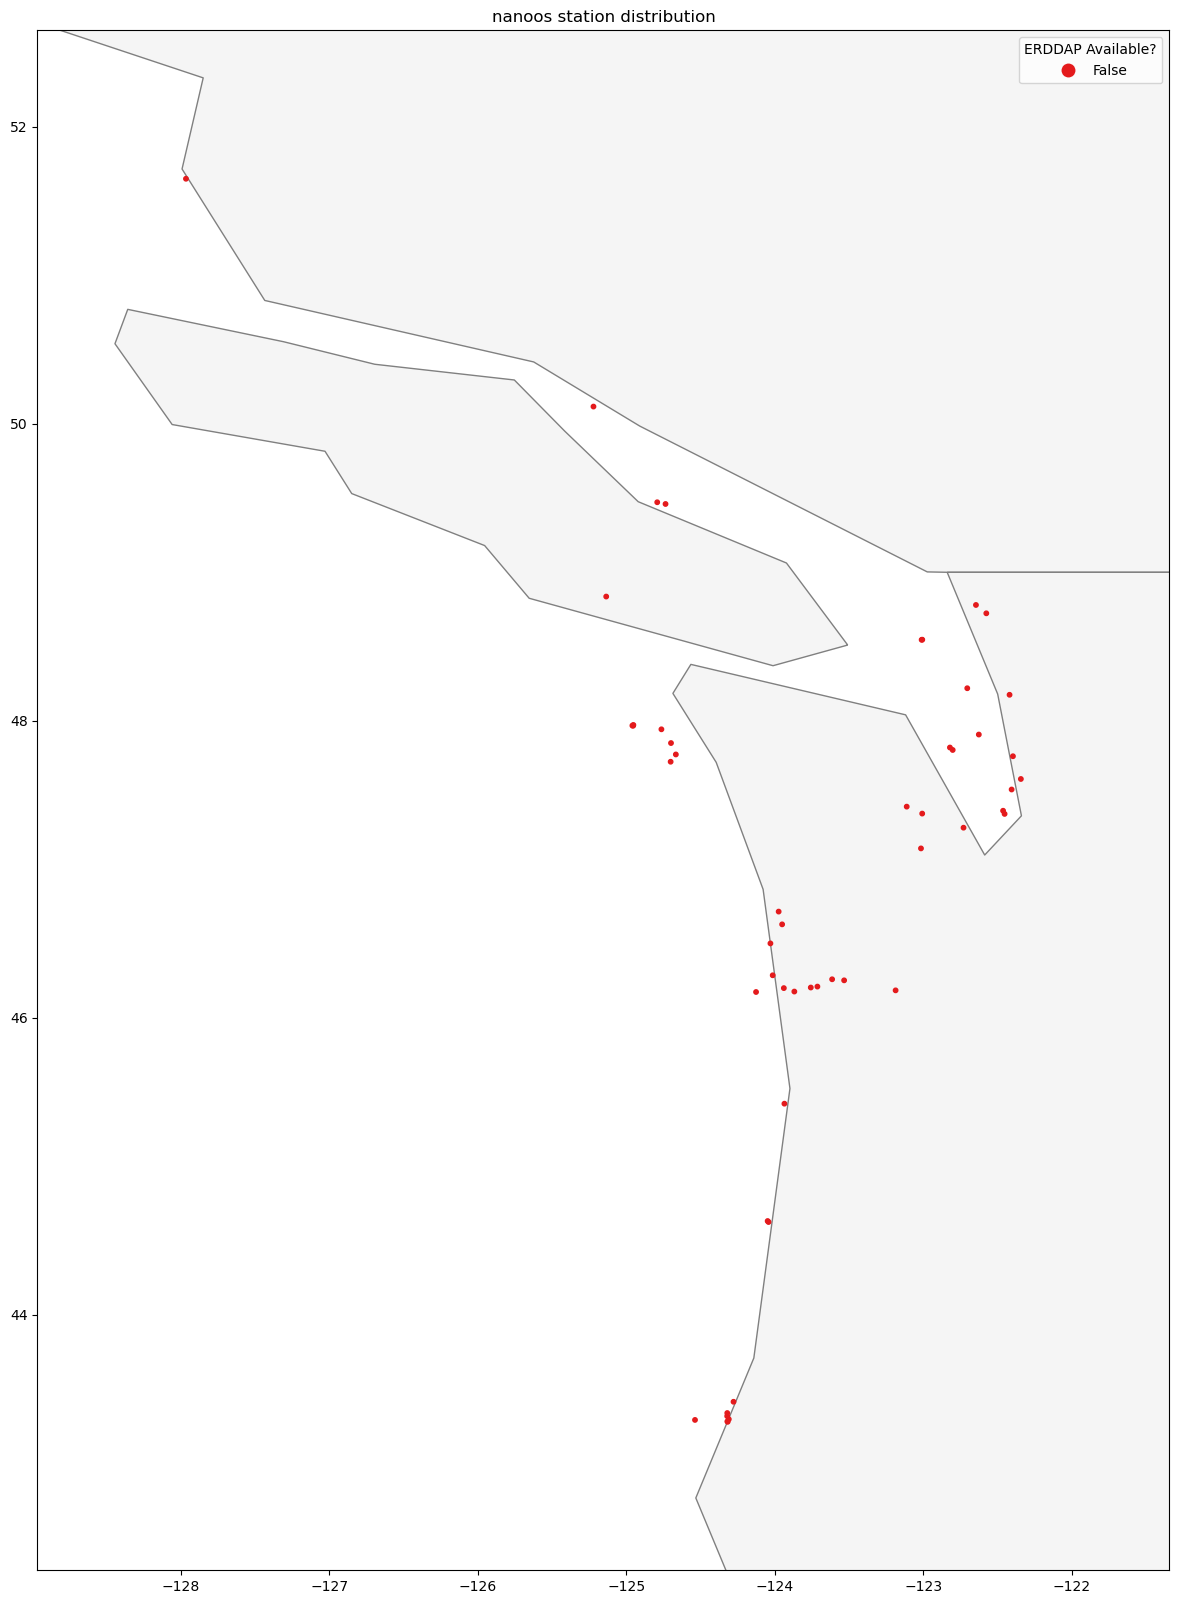

In [18]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [19]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1', style_kwds={"radius":5})


## Show me some bad coordinates

_if there are any_

In [20]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail


In [21]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

# Show me the stations where ERDDAP doesn't exist or provide a valid response.

Reasons:
* Station not found on RA erddap
* dataset found but no data for this CY.

In [22]:
gdf_final.loc[~gdf_final['erddap_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail
0,NANOOS,APL-UW ESP,NaN,APL-UW ESP Mooring,NaN,47.9717,-124.9533,moored buoy,2011-08-01 00:00:00,Y,NaN,Yp,Applied Physics Laboratory-University of Washi...,academic,APL-UW,APL-UW,N/A (see notes),No WMO ID because this asset does not serve da...,POINT (-124.95330 47.97170),False
1,NANOOS,APL-UW NEMO Profiler,NaN,APL-UW NEMO-ESP Profiler,NaN,47.9667,-124.9549,profiling buoy,2011-08-01 00:00:00,Y,NaN,Yf,APL-UW,academic,APL-UW,APL-UW,"sea_water_electrical_conductivity (profiling),...",No WMO ID established yet; profiling from ~20m...,POINT (-124.95490 47.96670),False
2,NANOOS,APL-UW Chaba,46119,Chaba UW/NANOOS Moored Buoy near La Push,NaN,47.9676,-124.96,moored buoy,2010-07-01 00:00:00,Y,NaN,Yp,APL-UW,academic,APL-UW,APL-UW,"air_temperature, surface_air_pressure, surface...",NaN,POINT (-124.96000 47.96760),False
3,NANOOS,BB Quileute North,NaN,Backyard Buoys Quileute North,Pending,47.9425,-124.7645,wave buoy,2023-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.76450 47.94250),False
4,NANOOS,BB Quileute South,NaN,Backyard Buoys Quileute South,Pending,47.85,-124.7,wave buoy,2024-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.70000 47.85000),False
5,NANOOS,CMOP Cbnc3,NaN,Cathlamet Bay North Channel (USCG day mark gre...,NaN,46.21,-123.714,fixed shore platform,2001-10-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (6.5m), sea_water...",No WMO ID because asset not real-time.,POINT (-123.71400 46.21000),False
6,NANOOS,CMOP Elliott,NaN,Elliott Point,NaN,46.2591,-123.6149,moored buoy,2001-07-01 00:00:00,O,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (13m), sea_water_...",Currently deployed without instrumentation as ...,POINT (-123.61490 46.25910),False
7,NANOOS,CMOP Saturn 02,46096,SATURN-02,NaN,46.1735,-124.1272,moored buoy,2006-05-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"air_temperature, surface_air_pressure, surface...",Note that Saturn-02 is deployed seasonally and...,POINT (-124.12720 46.17350),False
8,NANOOS,CMOP Saturn 03,SETO3,SATURN-03,NaN,46.1997,-123.94,fixed shore platform,2008-04-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,mass_concentration_of_chlorophyll_in_sea_water...,NaN,POINT (-123.94000 46.19970),False
9,NANOOS,CMOP Saturn 04,SEFO3,SATURN-04,NaN,46.2036,-123.7586,fixed shore platform,2001-11-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,concentration_of_colored_dissolved_organic_mat...,Currently working to rebuild flow-through system,POINT (-123.75860 46.20360),False


# Do some checking against the IOOS catalog

only for datasets that we couldn't find in ERDDAP (per above)

In [23]:
from ckanapi import RemoteCKAN
import xarray as xr

problem_datasets = []

ua = 'ckanapiioos/1.0 (+https://ioos.us/)'

#ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua, get_only=True)
ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua)
ioos_catalog

gdf_ckan = gdf_final.loc[~gdf_final['erddap_avail']]

for station in gdf_ckan['Station ID'].dropna():

    RA = gdf_ckan.loc[gdf_ckan['Station ID']==station,'RA'].tolist()[0]
    
    print('Station "{}" + RA "{}"'.format(station.lower(), RA.lower()))
    
    # build RA tag query
    fq = '+organization:{}'.format(RA.lower())

    # build free text query
    q = "\""+station.lower()+"\""+" -glider"

    query = ioos_catalog.address + '/dataset/?' + 'q=' + q + '&organization=' + RA.lower()
    
    print('Query: {}'.format(query.replace(" ","%20")))

    datasets = ioos_catalog.action.package_search(q=q, fq=fq)

    

    if datasets['count'] > 0:
        print('\tfound {} dataset(s):'.format(datasets['count']))
        
        for dataset in datasets['results']:
            print('\t',dataset['title'])
            
            
            if dataset['resources']:
                print('\t',dataset['resources'][0]['url'])

                start_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-begin")['value']
                end_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-end")['value']

                print('\t','Coverage Meta:\n\t\t', start_date,' - ',end_date,'\n')

                if 'thredds' in dataset['resources'][0]['url']:
                    ds = xr.open_dataset(dataset['resources'][0]['url'])

                    time_max = ds.time.max().values

                    time_min = ds.time.min().values


                    print('\tCoverage Data:\n\t\t', time_min,' - ',time_max, '\n')

                    if pd.to_datetime(end_date) < pd.to_datetime(time_max, utc=True):
                        test_date = pd.to_datetime(time_max, utc=True)

                else:
                    test_date = pd.to_datetime(end_date, utc=True)

                if test_date > pd.to_datetime('{}-01-01'.format(cy), utc=True):
                    print('\t{} is valid.'.format(station))
                    break
                else:
                    print('\t{} is not valid.'.format(station))

                    problem_datasets.append(station)
            
            else:
                print('\t{} missing additional metadata'.format(station))
                problem_datasets.append(station)
    else:
        print("\tNo datasets found!")
        problem_datasets.append(station)

Station "apl-uw esp" + RA "nanoos"
Query: https://data.ioos.us/dataset/?q="apl-uw%20esp"%20-glider&organization=nanoos
	No datasets found!
Station "apl-uw nemo profiler" + RA "nanoos"
Query: https://data.ioos.us/dataset/?q="apl-uw%20nemo%20profiler"%20-glider&organization=nanoos
	found 1 dataset(s):
	 (APL-UW) UW/NANOOS NEMO Subsurface profiler near La Push
	 http://data.nanoos.org/52nsos/sos/kvp?outputFormat=text/xml; subtype="sensorML/1.0.1/profiles/ioos_sos/1.0"&version=1.0.0&request=DescribeSensor&procedure=urn:ioos:station:nanoos:apl_nemo&service=SOS
	 Coverage Meta:
		 2017-08-27T03:43:55+00:00  -  2018-10-16T16:53:59+00:00 

	APL-UW NEMO Profiler is not valid.
Station "apl-uw chaba" + RA "nanoos"
Query: https://data.ioos.us/dataset/?q="apl-uw%20chaba"%20-glider&organization=nanoos
	No datasets found!
Station "bb quileute north" + RA "nanoos"
Query: https://data.ioos.us/dataset/?q="bb%20quileute%20north"%20-glider&organization=nanoos
	No datasets found!
Station "bb quileute south

Check the datasets that didn't have coverage in ERDDAP or through IOOS catalog and see if they are **Currently Operational?**

In [24]:
gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry,erddap_avail
0,NANOOS,APL-UW ESP,NaN,APL-UW ESP Mooring,NaN,47.9717,-124.9533,moored buoy,2011-08-01 00:00:00,Y,NaN,Yp,Applied Physics Laboratory-University of Washi...,academic,APL-UW,APL-UW,N/A (see notes),No WMO ID because this asset does not serve da...,POINT (-124.95330 47.97170),False
1,NANOOS,APL-UW NEMO Profiler,NaN,APL-UW NEMO-ESP Profiler,NaN,47.9667,-124.9549,profiling buoy,2011-08-01 00:00:00,Y,NaN,Yf,APL-UW,academic,APL-UW,APL-UW,"sea_water_electrical_conductivity (profiling),...",No WMO ID established yet; profiling from ~20m...,POINT (-124.95490 47.96670),False
2,NANOOS,APL-UW Chaba,46119,Chaba UW/NANOOS Moored Buoy near La Push,NaN,47.9676,-124.96,moored buoy,2010-07-01 00:00:00,Y,NaN,Yp,APL-UW,academic,APL-UW,APL-UW,"air_temperature, surface_air_pressure, surface...",NaN,POINT (-124.96000 47.96760),False
3,NANOOS,BB Quileute North,NaN,Backyard Buoys Quileute North,Pending,47.9425,-124.7645,wave buoy,2023-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.76450 47.94250),False
4,NANOOS,BB Quileute South,NaN,Backyard Buoys Quileute South,Pending,47.85,-124.7,wave buoy,2024-05-01 00:00:00,Y,NaN,Yf,Quileute Tribe,tribal,Quileute Tribe,APL-UW,"surface_air_pressure, sea_surface_wave_from_di...",WMO ID pending,POINT (-124.70000 47.85000),False
5,NANOOS,CMOP Cbnc3,NaN,Cathlamet Bay North Channel (USCG day mark gre...,NaN,46.21,-123.714,fixed shore platform,2001-10-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (6.5m), sea_water...",No WMO ID because asset not real-time.,POINT (-123.71400 46.21000),False
6,NANOOS,CMOP Elliott,NaN,Elliott Point,NaN,46.2591,-123.6149,moored buoy,2001-07-01 00:00:00,O,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"sea_water_practical_salinity (13m), sea_water_...",Currently deployed without instrumentation as ...,POINT (-123.61490 46.25910),False
7,NANOOS,CMOP Saturn 02,46096,SATURN-02,NaN,46.1735,-124.1272,moored buoy,2006-05-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,"air_temperature, surface_air_pressure, surface...",Note that Saturn-02 is deployed seasonally and...,POINT (-124.12720 46.17350),False
8,NANOOS,CMOP Saturn 03,SETO3,SATURN-03,NaN,46.1997,-123.94,fixed shore platform,2008-04-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,mass_concentration_of_chlorophyll_in_sea_water...,NaN,POINT (-123.94000 46.19970),False
9,NANOOS,CMOP Saturn 04,SEFO3,SATURN-04,NaN,46.2036,-123.7586,fixed shore platform,2001-11-01 00:00:00,Y,NaN,Yp,CRITFC,tribal,CRITFC,CRITFC,concentration_of_colored_dissolved_organic_mat...,Currently working to rebuild flow-through system,POINT (-123.75860 46.20360),False


Print out the available metadata from the IOOS Catalog for the last dataset.

In [25]:
dataset

{'author': None,
 'author_email': None,
 'creator_user_id': '0ea3933c-4674-41dd-a17d-bfbc8c99bd75',
 'id': '272e8d4d-a663-4085-8010-166123bf8f03',
 'isopen': False,
 'license_id': None,
 'license_title': None,
 'maintainer': None,
 'maintainer_email': None,
 'metadata_created': '2025-01-09T13:28:18.111033',
 'metadata_modified': '2025-01-09T13:28:18.111050',
 'name': 'whiskeycrshelfish-pcsga-whiskey-creek-shellfish-hatchery-netarts-bay',
 'notes': '\nIOOS Sensor Observation Service (SOS) Server for NANOOS, the Northwest Association of Networked Ocean Observing Systems (http://nanoos.org). Provides access to marine in-situ observation data for the US Pacific Northwest and lower British Columbia, from the NANOOS asset data store harvested and integrated by NVS (NANOOS Visualization System, http://nvs.nanoos.org). To avoid data duplication, currently only assets not otherwise available to the IOOS Catalog (http://catalog.ioos.us) are accessible through this SOS server; for example, assets

In [26]:
# GLOS special case as they provide ERDDAP ID

# for dataset in gdf_final.loc[(~gdf_final['erddap_avail'] & ~gdf_final['Dataset (ERDDAP) ID'].isna()),'Dataset (ERDDAP) ID'].tolist():
#     print(dataset)
#     e.dataset_id = dataset
    
#     e.constraints = {
#                  "time>=": "{}-01-01".format(cy)
#             }
        
#     e.variables = ['time']
    
#     try:
        
#         df_data = e.to_pandas(parse_dates=True)
        
#         string = '\tDate range: {} - {}'.format(df_data.min()[0],df_data.max()[0])
        
#         print(string)
        
#         if pd.to_datetime(df_data.max()[0], utc=True) > pd.to_datetime('{}-01-01'.format(cy), utc=True):
            
#             datasetid = gdf_final.loc[gdf_final['Dataset (ERDDAP) ID']==dataset,'Station ID'].tolist()[0]
            
#             problem_datasets.remove(datasetid)
        
#     except:
#         print('\tNo valid data')

In [27]:
#gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]